# Project: SoccerData - How the formation influences the outcome of the game

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this Project the soccer dataset will be explored, since soccer has always been the love of my life.

There is so much to explore but here only the influence of the formation on the outcome of the game will be explored. **This project will investigate wether a team with a more defensive/offensive formation more likeley to get less goals/to shoot more goals. And since this alone isn't an indicator of success, it will be analyzed wether more offensive or defensive and what kind of formations are more likely to win.**

## Getting the Data  

Via a SQL query (DB Browser) the relevant data is extracted. In this dataset every row contains information about both the home and the away team. For the following analysis it is more usefull to have these informationen seperated in two rows. So for example to calculate the average of the goals shot by a team there is no need to reference two columns but only one. With the intend not to lose information by separating the rows, a new column 'venue' was created to indicate wether a team played at 'home' or 'away'.

In this case the League name (*league_name*), the Id of each match (*match_api_id*), the goals shot (*goals_marked*), the goals received (*goals_received*), the venue of the match (*venue*) and the Y-axis positions of the players. 

After getting the data, four independent variables will be derived from the Y-axis of the players:

- the number of players on the defense
- the number of players in the middelfield
- the number of attackers
- the average of all Y-axis positions as an indicator how offensive or defensive a formation is

**This project explores wether the mentioned independet variables have an impact on the number of goals shot and received and with which formation it is more likely that a team wins.** 

To do so the following SQL-query extracted the relevant information from the dataset:


```sql

SELECT lh.name league_name, mh.match_api_id, mh.home_team_goal AS goals_marked, mh.away_team_goal AS goals_received, 'home' AS venue, mh.home_player_Y1 AS Y1, mh.home_player_Y2 AS Y2, mh.home_player_Y3 Y3, mh.home_player_Y4 Y4, mh.home_player_Y5 Y5, mh.home_player_Y6 Y6, mh.home_player_Y7 Y7, mh.home_player_Y8 Y8, mh.home_player_Y9 Y9, mh.home_player_Y10 Y10,mh.home_player_Y11 Y11
FROM match mh
JOIN league lh
ON mh.league_id = lh.country_id
WHERE lh.name IS Not NULL
AND mh.match_api_id IS Not NUll
AND mh.home_player_Y1 IS Not Null
AND mh.home_player_Y2 IS Not Null 
AND mh.home_player_Y3 IS Not Null 
AND mh.home_player_Y4 IS Not Null 
AND mh.home_player_Y5 IS Not Null 
AND mh.home_player_Y6 IS Not Null 
AND mh.home_player_Y7 IS Not Null 
AND mh.home_player_Y8 IS Not Null 
AND mh.home_player_Y9 IS Not Null 
AND mh.home_player_Y10 IS Not Null 
AND mh.home_player_Y11 IS Not Null
AND mh.away_player_Y1 IS Not Null 
AND mh.away_player_Y2 IS Not Null  
AND mh.away_player_Y3 IS Not Null 
AND mh.away_player_Y4 IS Not Null 
AND mh.away_player_Y5 IS Not Null 
AND mh.away_player_Y6 IS Not Null 
AND mh.away_player_Y7 IS Not Null 
AND mh.away_player_Y8 IS Not Null 
AND mh.away_player_Y9 IS Not Null 
AND mh.away_player_Y10 IS Not Null 
AND mh.away_player_Y11 IS Not Null 

UNION ALL

SELECT la.name league_name, ma.match_api_id, ma.away_team_goal AS goals_marked, ma.home_team_goal AS goals_received, 'away' AS venue, ma.away_player_Y1, ma.away_player_Y2, ma.away_player_Y3, ma.away_player_Y4, ma.away_player_Y5, ma.away_player_Y6, ma.away_player_Y7, ma.away_player_Y8, ma.away_player_Y9, ma.away_player_Y10, ma.away_player_Y11
FROM match ma
JOIN league la
ON ma.league_id = la.country_id
WHERE la.name IS Not NULL
AND ma.match_api_id IS Not NUll
AND ma.away_player_Y1 IS Not Null 
AND ma.away_player_Y2 IS Not Null  
AND ma.away_player_Y3 IS Not Null 
AND ma.away_player_Y4 IS Not Null 
AND ma.away_player_Y5 IS Not Null 
AND ma.away_player_Y6 IS Not Null 
AND ma.away_player_Y7 IS Not Null 
AND ma.away_player_Y8 IS Not Null 
AND ma.away_player_Y9 IS Not Null 
AND ma.away_player_Y10 IS Not Null 
AND ma.away_player_Y11 IS Not Null
AND ma.home_player_Y1 IS Not Null
AND ma.home_player_Y2 IS Not Null 
AND ma.home_player_Y3 IS Not Null 
AND ma.home_player_Y4 IS Not Null 
AND ma.home_player_Y5 IS Not Null 
AND ma.home_player_Y6 IS Not Null 
AND ma.home_player_Y7 IS Not Null 
AND ma.home_player_Y8 IS Not Null 
AND ma.home_player_Y9 IS Not Null 
AND ma.home_player_Y10 IS Not Null 
AND ma.home_player_Y11 IS Not Null;

```

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('SQL_query_investigate2.csv')
df.head()

,league_name,match_api_id,goals_marked,goals_received,venue,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11
0,Belgium Jupiler League,493016,1,1,home,1,3,3,3,3,7,7,7,7,10,10
1,Belgium Jupiler League,493017,2,1,home,1,3,3,3,3,7,7,7,7,10,10
2,Belgium Jupiler League,493018,3,0,home,1,3,3,3,3,7,7,7,7,10,10
3,Belgium Jupiler League,493019,4,0,home,1,3,3,3,3,7,7,7,7,10,10
4,Belgium Jupiler League,493020,0,1,home,1,3,3,3,3,7,7,7,7,10,10


In [3]:
# inspect if the variables have the right datatype and look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48280 entries, 0 to 48279
Data columns (total 16 columns):
league_name       48280 non-null object
match_api_id      48280 non-null int64
goals_marked      48280 non-null int64
goals_received    48280 non-null int64
venue             48280 non-null object
Y1                48280 non-null int64
Y2                48280 non-null int64
Y3                48280 non-null int64
Y4                48280 non-null int64
Y5                48280 non-null int64
Y6                48280 non-null int64
Y7                48280 non-null int64
Y8                48280 non-null int64
Y9                48280 non-null int64
Y10               48280 non-null int64
Y11               48280 non-null int64
dtypes: int64(14), object(2)
memory usage: 5.9+ MB


The datatypes seem ok and there are no missing values. This is due to the fact, that observations with missing values were obmitted from the dataset through the SQL-query. 

>In the first attempt to this project I omitted missing values in the Project Notebook. Unfortunately in the following steps some 
abnormalities occurred. For example the count of lost and won matches wasn't equal. If only one team of a match had missing Y-values, then due to the row separation one team stays in the dataset and the other is omitted due to missing values. This should now be fixed by 

### Data Cleaning - Checking missing Y-values and duplicates

In [4]:
df.isnull().sum()

league_name       0
match_api_id      0
goals_marked      0
goals_received    0
venue             0
Y1                0
Y2                0
Y3                0
Y4                0
Y5                0
Y6                0
Y7                0
Y8                0
Y9                0
Y10               0
Y11               0
dtype: int64

There shouldn't be any duplicates - but better check:

In [5]:
sum(df.duplicated())

0

### Variable Creation 

With this clean dataset the beforementioned new independent variables can be created.  

1. Create a function that iterates over the Y-values in its row and counts
the number of defenders (2-3) middlefield players (4-10) and attackers (>10) and gives back a column that returns for eacht row the formation in the format x-x-x. 

2. Create three columns that include only the number of defenders (n_def), of middlefield players (n_mid) and attackers (n_att).

3. Create an indicator that measures whether the formation is more defensive or offensive - this is done by summing up the Y-values. The higher the sum, the more offensive the formation.


In [6]:
# create a function that iterates over the Y-values in its row and counts
# the number of defenders (2-3) middlefield players (4-10) and attackers (>10)

# to create columns based on conditions I searched on stackoverflow:
# https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def y_count(row):
    Ys = ['Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11']
    def_count= 0
    mid_count= 0
    att_count= 0

    for i in Ys:
        if row[i] >= 2 and row[i] <= 3:
            def_count += 1
        elif row[i] >= 4 and row[i] < 10:
            mid_count += 1
        else:
            att_count += 1
            
    formation = "{}-{}-{}".format(def_count,mid_count,att_count)  
    return formation

df['formation'] = df.apply(y_count, axis=1)

In [7]:
# 2. Three functions that create three columns indicating the count of defenders, 
# midfield players and attackers. 

# I tried to just grab the information from the 'formation' column but I wasn't able 
# to iterate over the rows. I tried:
#
# df['n_def'] = df.apply(int(df.iloc[row]['formation'][0]), axis=1)
#
# NameError:  name 'row' is not defined
#
# How should the function look like?


def def_count(row):
    Ys = ['Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11']
    def_ct= 0
    
    for i in Ys:
        if row[i] >= 2 and row[i] <= 3:
            def_ct += 1
    return int(def_ct)

def mid_count(row):
    Ys = ['Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11']
    mid_ct= 0
    
    for i in Ys:
        if row[i] >= 4 and row[i] < 10:
            mid_ct += 1
    return int(mid_ct)

def att_count(row):
    Ys = ['Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11']
    att_ct= 0
    
    for i in Ys:
        if row[i] >= 10:
            att_ct += 1
    return int(att_ct)

df['n_def'] = df.apply(def_count, axis=1)
df['n_mid'] = df.apply(mid_count, axis=1)
df['n_att'] = df.apply(att_count, axis=1)

In [8]:
# create a column containing an indicator that indicates how offensive/defensive a formation is - based on the sum of the Y-values
df['indicator'] = df.iloc[:,5:16].sum(axis=1)
df.tail()

,league_name,match_api_id,goals_marked,goals_received,venue,Y1,Y2,Y3,Y4,Y5,...,Y7,Y8,Y9,Y10,Y11,formation,n_def,n_mid,n_att,indicator
48275,Switzerland Super League,1992091,0,1,away,1,3,3,3,3,...,6,8,8,8,11,4-5-1,4,5,1,60
48276,Switzerland Super League,1992092,2,1,away,1,3,3,3,3,...,7,7,10,10,10,4-3-3,4,3,3,64
48277,Switzerland Super League,1992093,0,2,away,1,3,3,3,3,...,6,8,8,8,11,4-5-1,4,5,1,60
48278,Switzerland Super League,1992094,0,0,away,1,3,3,3,3,...,6,8,8,8,11,4-5-1,4,5,1,60
48279,Switzerland Super League,1992095,3,4,away,1,3,3,3,3,...,6,8,8,8,11,4-5-1,4,5,1,60


Now that the independent variables are created, we only need one extra column that tells wether the match was won or lost

In [9]:
def match_out(row):
    if row['goals_marked'] > row['goals_received']:
        return 'win'
    if row['goals_marked'] < row['goals_received']:
        return 'lose'
    else:
        return 'draw'

df['match_outcome'] = df.apply(match_out, axis=1)

In [10]:
df.head()

,league_name,match_api_id,goals_marked,goals_received,venue,Y1,Y2,Y3,Y4,Y5,...,Y8,Y9,Y10,Y11,formation,n_def,n_mid,n_att,indicator,match_outcome
0,Belgium Jupiler League,493016,1,1,home,1,3,3,3,3,...,7,7,10,10,4-4-2,4,4,2,61,draw
1,Belgium Jupiler League,493017,2,1,home,1,3,3,3,3,...,7,7,10,10,4-4-2,4,4,2,61,win
2,Belgium Jupiler League,493018,3,0,home,1,3,3,3,3,...,7,7,10,10,4-4-2,4,4,2,61,win
3,Belgium Jupiler League,493019,4,0,home,1,3,3,3,3,...,7,7,10,10,4-4-2,4,4,2,61,win
4,Belgium Jupiler League,493020,0,1,home,1,3,3,3,3,...,7,7,10,10,4-4-2,4,4,2,61,lose


In [11]:
# doublecheck if the created columns have the right format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48280 entries, 0 to 48279
Data columns (total 22 columns):
league_name       48280 non-null object
match_api_id      48280 non-null int64
goals_marked      48280 non-null int64
goals_received    48280 non-null int64
venue             48280 non-null object
Y1                48280 non-null int64
Y2                48280 non-null int64
Y3                48280 non-null int64
Y4                48280 non-null int64
Y5                48280 non-null int64
Y6                48280 non-null int64
Y7                48280 non-null int64
Y8                48280 non-null int64
Y9                48280 non-null int64
Y10               48280 non-null int64
Y11               48280 non-null int64
formation         48280 non-null object
n_def             48280 non-null int64
n_mid             48280 non-null int64
n_att             48280 non-null int64
indicator         48280 non-null int64
match_outcome     48280 non-null object
dtypes: int64(18), object(4)


<a id='eda'></a>
## Exploratory Data Analysis

### Calculate the benchmark

1. the mean of goals shot per match and the distribution of goals shot per match
2. the percentage of matches that were won/lost 

In [12]:
df['goals_marked'].mean()


1.3621996685998343

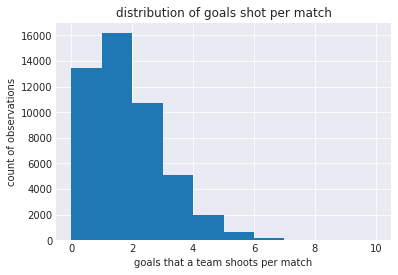

In [13]:
df['goals_marked'].hist()
plt.xlabel('goals that a team shoots per match')
plt.ylabel('count of observations')
plt.title('distribution of goals shot per match');

In [14]:
df['match_outcome'].value_counts()

lose    18020
win     18020
draw    12240
Name: match_outcome, dtype: int64

In [15]:
# get the outcome proportions by dividing the categories by total
outcome_prop = df['match_outcome'].value_counts()/ df['match_outcome'].count()
outcome_prop

lose    0.373239
win     0.373239
draw    0.253521
Name: match_outcome, dtype: float64

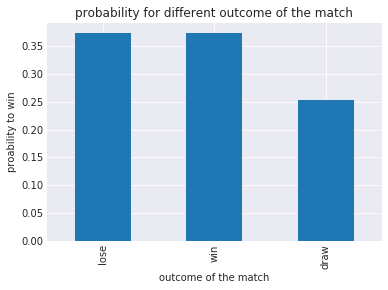

In [16]:
# plot the results
outcome_prop.plot(kind='bar')
plt.xlabel('outcome of the match')
plt.ylabel('proability to win')
plt.title('probability for different outcome of the match');

### Impact of the formation on the goals shot and received

#### indicator vs. goals_marked / goals_received 

61.2938483844


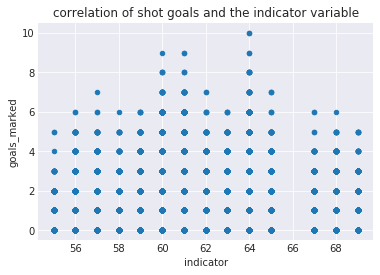

In [18]:
# Is there a correlation of the 'indicator' variable and the goals shot and goals received ?
print(df['indicator'].mean())
df.plot(x='indicator', y='goals_marked', kind='scatter', title='correlation of shot goals and the indicator variable');


In [19]:
np.corrcoef(df['indicator'],df['goals_marked'])

array([[ 1.        ,  0.04093515],
       [ 0.04093515,  1.        ]])

According to the scatterplot there is no apparent correlation. The only thing that can be said, is that in this dataset no team ever shot more than 7 goals with an extremely offensive formation. The observation is underpinned by the following correlation coefficient, that is slightly above 0. 

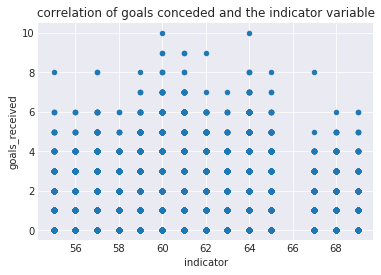

In [20]:
df.plot(x='indicator', y='goals_received', kind='scatter', title='correlation of goals conceded and the indicator variable');

In [21]:
np.corrcoef(df['indicator'],df['goals_received'])

array([[ 1.        , -0.01094149],
       [-0.01094149,  1.        ]])

The plot for received goals does not differ a lot from the previous one. In both cases there is no correlation of the 'indicator' variable and the goals shot. It rather looks like having a more mainstream formation (formations aroound the mean=61) lets you shoot more goals but you also get more goals, but this might also be explained by the fact that there are more mainstream-observations than extrem ones. Maybe the mean of goals shot for every indicator offers more insight: 

In [22]:
ind_marked_mean = df.groupby('indicator')['goals_marked'].mean()
ind_marked_mean

indicator
55    0.980676
56    1.385925
57    1.179751
58    1.299603
59    1.195138
60    1.353722
61    1.360280
62    1.310515
63    1.461707
64    1.478122
65    1.293005
67    1.361823
68    1.406360
69    1.387900
Name: goals_marked, dtype: float64

In [23]:
ind_marked_mean.index.values

array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69])

In [24]:
goals_mar_list = [df['goals_marked'].mean()] * 14

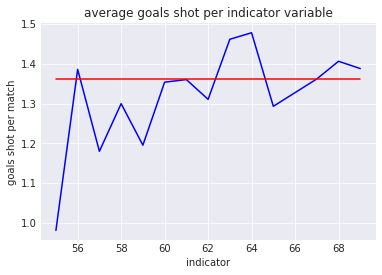

In [25]:
# remeber the mean of goals_marked = 1.36
plt.plot(ind_marked_mean.index.values, ind_marked_mean,'b-',ind_marked_mean.index.values, goals_mar_list,'r-' )
plt.xlabel('indicator')
plt.ylabel('goals shot per match')
plt.title('average goals shot per indicator variable');

there is a little trend indicating that a more offensive formation (>61) results in more goals shot. But this is only the case for formations with the sum of 63,64 and 68, whereas teams with more defensive formations in fact tend to shoot less goals. In fact slightly offensive formations seem to better fulfill their purpose than extremely offensive formations.

In [26]:
ind_received_mean = df.groupby('indicator')['goals_received'].mean()
ind_received_mean

indicator
55    1.768116
56    1.247446
57    1.468085
58    1.410714
59    1.379620
60    1.368237
61    1.347314
62    1.457304
63    1.343545
64    1.354475
65    1.333716
67    1.239316
68    1.358657
69    1.327402
Name: goals_received, dtype: float64

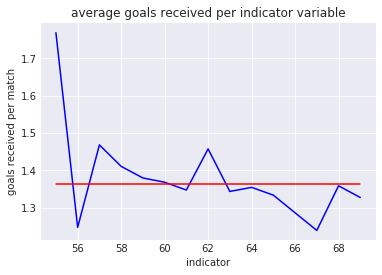

In [27]:
goals_rec_list = [df['goals_received'].mean()] * 14
plt.plot(ind_received_mean.index.values, ind_received_mean,'b-',ind_received_mean.index.values, goals_rec_list,'r-' )
plt.xlabel('indicator')
plt.ylabel('goals received per match')
plt.title('average goals received per indicator variable');

In contrast to the previous findings, the outcome here is really unexpected. More defensive formations (except for 56) get more goals on average than offensive formations. All offensive formations (>61) concede at maximum average goals. 

Let's see if taking the number of attackers and defenders comes to the same results:

#### number of attackers vs. goals_marked and number of defenders vs. goals_received

In [28]:
df.groupby('n_att')['goals_marked'].mean()

n_att
1    1.296239
2    1.375020
3    1.477084
Name: goals_marked, dtype: float64

In [29]:
df.groupby('n_def')['goals_received'].mean()

n_def
3    1.322180
4    1.360482
5    1.688663
Name: goals_received, dtype: float64

- Formations with more strikers also shoot more goals. When combining the findings from above, this means that when a team has two or three strikers the rest of the team should not also have to offensive positions. 

- The findings here support the hypothesis that more defensive formations correlate with the goals a team gets. In contrast to what one would think, the more defenders a team has, the more goals it gets. **But correlation is not causality:**  This can be explained by the fact, that when obviously 'inferior' teams play against obviously 'superior' teams (e.g. Real vs. Malaga) they mostly start with a more defensive formation but nevertheless lose and get more goals because they are inferior to the other team.

#### Likelihood that a team wins depending on the formation

In [30]:
# creating a column that calculates the difference of goals shot and received
df['goals_diff'] = df['goals_marked']-df['goals_received']

# and grouping by the formation to see which combination of attackers and defenders is best balanced to shoot
# more goals than it received 
df.groupby('formation')['goals_diff'].mean()

formation
3-4-3    0.047703
3-5-2   -0.001182
3-6-1   -0.001560
4-3-3    0.133237
4-4-2    0.047683
4-5-1   -0.083893
5-3-2   -0.571053
5-4-1   -0.772512
Name: goals_diff, dtype: float64

In [31]:
form_counts = df.groupby('formation')['match_outcome'].count()
form_counts

formation
3-4-3      566
3-5-2     1692
3-6-1      641
4-3-3     8969
4-4-2    16463
4-5-1    19358
5-3-2      380
5-4-1      211
Name: match_outcome, dtype: int64

In [32]:
win_counts = df.query('match_outcome == "win"').groupby('formation')['match_outcome'].count()
win_counts

formation
3-4-3     211
3-5-2     618
3-6-1     222
4-3-3    3614
4-4-2    6366
4-5-1    6844
5-3-2      93
5-4-1      52
Name: match_outcome, dtype: int64

In [33]:
prob = win_counts/form_counts
prob

formation
3-4-3    0.372792
3-5-2    0.365248
3-6-1    0.346334
4-3-3    0.402943
4-4-2    0.386685
4-5-1    0.353549
5-3-2    0.244737
5-4-1    0.246445
Name: match_outcome, dtype: float64

In [34]:
outcome_prop[0]

0.37323943661971831

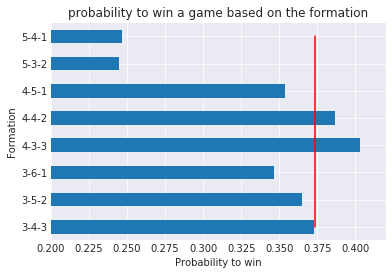

In [35]:
# remember mean of winning = 0.373239

df_prob = pd.DataFrame({"mean" : [0.373239]}, index = [prob.index.values])
df_prob['form_prob'] = prob
df_prob

fig = plt.figure()
df_prob['form_prob'].plot(kind='barh')
plt.plot(df_prob['mean'],df_prob.index.values, 'r-')
plt.xlabel('Probability to win')
plt.ylabel('Formation')
plt.axis([0.2, 0.42, -0.5,7.5])
plt.title('probability to win a game based on the formation');

4-4-2 and 4-3-3 have on scored more goals than they received on average. Teams with 5 defenders were not very succesful in the past and lost more games than they won. 

<a id='conclusions'></a>
## Conclusions

- The findings confirm that a formation with 3 attackers on average scores more goals than a formation with 2 or 1 strikers.
- Teams that played with 5 defenders were more likely to get more goals than they shot and on average got more goals than teams with less defenders.
- When only looking at the number of defenders-statistics there is no clear choice wether 3 or 4 defenders are better in preventing goals. Much more it depends on the whole formation.
- In this dataset the formations 4-4-2 and 4-3-3 were the most succesful on average, having 3.0 and 1.3 percentage points higher likelhood to win a match. 
- The 4-5-1 formation is the most commonly used formation, eventough 4 other formations were more succesful in the past.   

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0